# importando dados

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

dados_puro = pd.read_csv("dados.csv", index_col=0)

dados_puro

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2021-03-09,0,25.1,96.0,3.289
1,2021-03-09,100,25.1,93.0,1.740
2,2021-03-09,200,24.7,94.0,0.970
3,2021-03-09,300,24.4,93.0,2.458
4,2021-03-09,400,24.3,92.0,3.320
...,...,...,...,...,...
8779,2022-03-09,1900,25.4,96.0,96.821
8780,2022-03-09,2000,25.6,97.0,103.734
8781,2022-03-09,2100,25.2,97.0,37.913
8782,2022-03-09,2200,24.9,97.0,3.947


In [2]:
dados_puro.apply(pd.isnull).sum()/dados_puro.shape[0]

DT_MEDICAO    0.000000
HR_MEDICAO    0.000000
TEM_INS       0.010132
UMD_INS       0.032218
RAD_GLO       0.010132
dtype: float64

# renomea 

In [3]:
dados_puro.columns = ['data','horario', 'temperatura', 'umidade', 'radiacao']

core_dados = dados_puro

In [4]:
core_dados

,data,horario,temperatura,umidade,radiacao
0,2021-03-09,0,25.1,96.0,3.289
1,2021-03-09,100,25.1,93.0,1.740
2,2021-03-09,200,24.7,94.0,0.970
3,2021-03-09,300,24.4,93.0,2.458
4,2021-03-09,400,24.3,92.0,3.320
...,...,...,...,...,...
8779,2022-03-09,1900,25.4,96.0,96.821
8780,2022-03-09,2000,25.6,97.0,103.734
8781,2022-03-09,2100,25.2,97.0,37.913
8782,2022-03-09,2200,24.9,97.0,3.947


In [5]:
core_dados = core_dados.set_index(['data']).copy()

In [6]:
core_dados

,horario,temperatura,umidade,radiacao
data,,,,
2021-03-09,0,25.1,96.0,3.289
2021-03-09,100,25.1,93.0,1.740
2021-03-09,200,24.7,94.0,0.970
2021-03-09,300,24.4,93.0,2.458
2021-03-09,400,24.3,92.0,3.320
...,...,...,...,...
2022-03-09,1900,25.4,96.0,96.821
2022-03-09,2000,25.6,97.0,103.734
2022-03-09,2100,25.2,97.0,37.913


In [7]:
core_dados['temperatura'].value_counts()

24.2    222
24.3    221
24.6    220
24.8    208
24.7    207
       ... 
35.6      1
21.2      1
34.6      1
35.2      1
22.0      1
Name: temperatura, Length: 129, dtype: int64

# verficando se tem dados null

In [8]:
core_dados[pd.isnull(core_dados['temperatura'])]

,horario,temperatura,umidade,radiacao
data,,,,
2021-09-28,800,NaN,NaN,NaN
2021-09-28,900,NaN,NaN,NaN
2021-09-28,1000,NaN,NaN,NaN
2021-09-28,1100,NaN,NaN,NaN
2021-09-28,1200,NaN,NaN,NaN
...,...,...,...,...
2022-02-14,0,NaN,NaN,NaN
2022-02-17,100,NaN,NaN,NaN
2022-03-01,2300,NaN,NaN,NaN


In [9]:
core_dados[pd.isnull(core_dados['umidade'])]

,horario,temperatura,umidade,radiacao
data,,,,
2021-06-04,700,23.6,NaN,-2.893
2021-06-04,800,23.3,NaN,-2.534
2021-06-04,900,23.2,NaN,-2.395
2021-06-05,900,23.7,NaN,-2.524
2021-06-05,1000,24.2,NaN,43.188
...,...,...,...,...
2022-02-14,0,NaN,NaN,NaN
2022-02-17,100,NaN,NaN,NaN
2022-03-01,2300,NaN,NaN,NaN


In [10]:
core_dados.loc['2021-09-28':'2022-03-08']

,horario,temperatura,umidade,radiacao
data,,,,
2021-09-28,0,24.0,97.0,0.114
2021-09-28,100,23.7,97.0,-1.342
2021-09-28,200,23.8,98.0,-2.704
2021-09-28,300,23.5,98.0,-2.790
2021-09-28,400,23.4,98.0,-2.515
...,...,...,...,...
2022-03-08,1900,30.5,71.0,1531.750
2022-03-08,2000,26.9,87.0,645.060
2022-03-08,2100,27.5,86.0,263.704


In [11]:
core_dados = core_dados.fillna(method='ffill')

In [12]:
core_dados.apply(pd.isnull).sum()/dados_puro.shape[0]

horario        0.0
temperatura    0.0
umidade        0.0
radiacao       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [13]:
core_dados.dtypes

horario          int64
temperatura    float64
umidade        float64
radiacao       float64
dtype: object

In [14]:
core_dados.index

Index(['2021-03-09', '2021-03-09', '2021-03-09', '2021-03-09', '2021-03-09',
       '2021-03-09', '2021-03-09', '2021-03-09', '2021-03-09', '2021-03-09',
       ...
       '2022-03-09', '2022-03-09', '2022-03-09', '2022-03-09', '2022-03-09',
       '2022-03-09', '2022-03-09', '2022-03-09', '2022-03-09', '2022-03-09'],
      dtype='object', name='data', length=8784)

# convertando o index dos dados para data e horario index

### que nos ajudará a obter alguns dados com ano, dia e mês

In [15]:
core_dados.index = pd.to_datetime(core_dados.index)

In [16]:
core_dados.index

DatetimeIndex(['2021-03-09', '2021-03-09', '2021-03-09', '2021-03-09',
               '2021-03-09', '2021-03-09', '2021-03-09', '2021-03-09',
               '2021-03-09', '2021-03-09',
               ...
               '2022-03-09', '2022-03-09', '2022-03-09', '2022-03-09',
               '2022-03-09', '2022-03-09', '2022-03-09', '2022-03-09',
               '2022-03-09', '2022-03-09'],
              dtype='datetime64[ns]', name='data', length=8784, freq=None)

### tipo assim proculamos com ano no index dos dados 

In [17]:
core_dados.index.year

Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='data', length=8784)

In [18]:
core_dados.horario.count()

8784

In [19]:
core_dados

,horario,temperatura,umidade,radiacao
data,,,,
2021-03-09,0,25.1,96.0,3.289
2021-03-09,100,25.1,93.0,1.740
2021-03-09,200,24.7,94.0,0.970
2021-03-09,300,24.4,93.0,2.458
2021-03-09,400,24.3,92.0,3.320
...,...,...,...,...
2022-03-09,1900,25.4,96.0,96.821
2022-03-09,2000,25.6,97.0,103.734
2022-03-09,2100,25.2,97.0,37.913


<AxesSubplot:xlabel='data'>

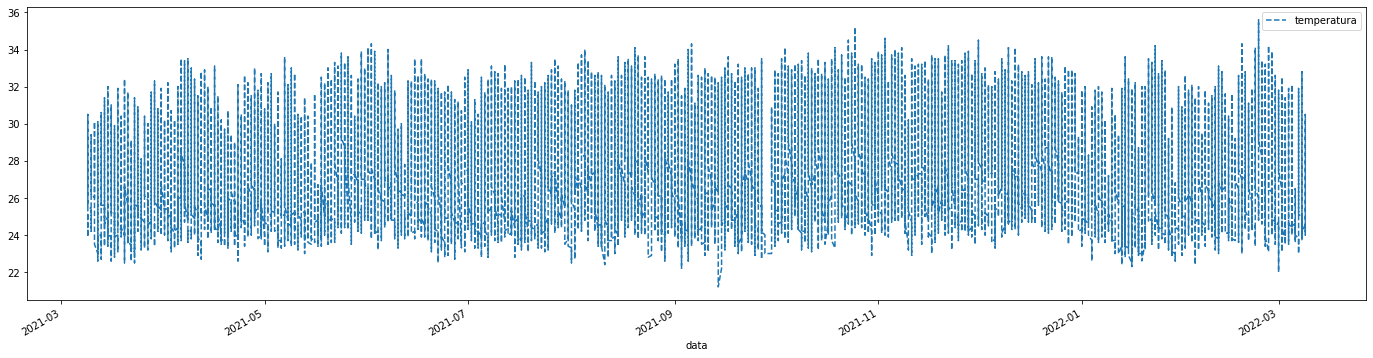

In [20]:

core_dados[['temperatura']].plot(figsize=(24,6), style=["--"],label="interpolada")

<AxesSubplot:xlabel='data'>

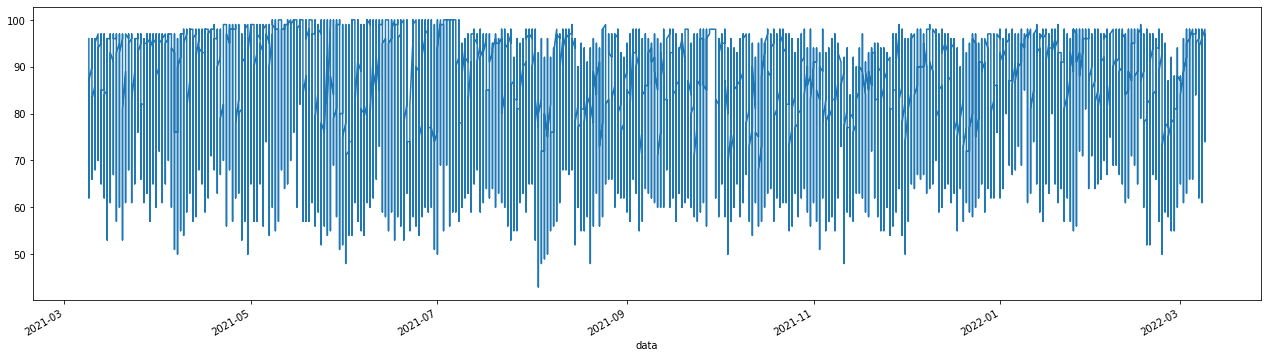

In [21]:
core_dados["umidade"].plot(figsize=(22,6))

<AxesSubplot:xlabel='data'>

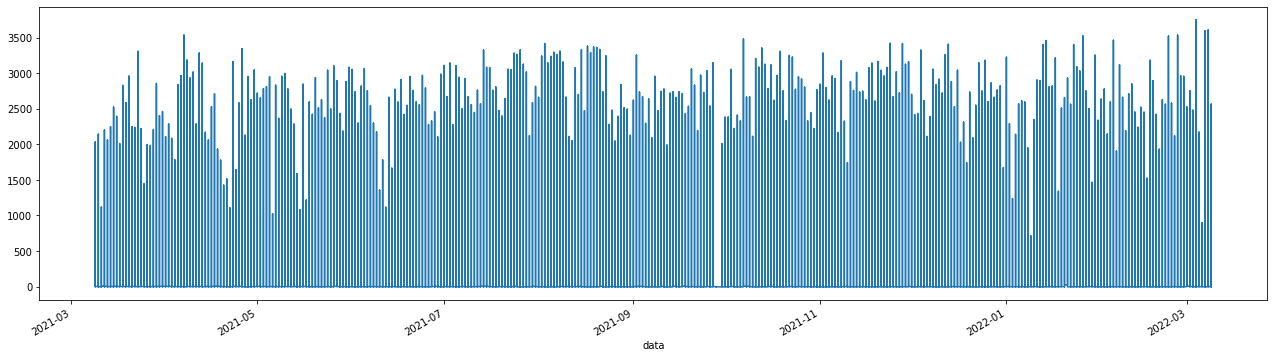

In [22]:
core_dados["radiacao"].plot(figsize=(22,6))

<AxesSubplot:xlabel='data'>

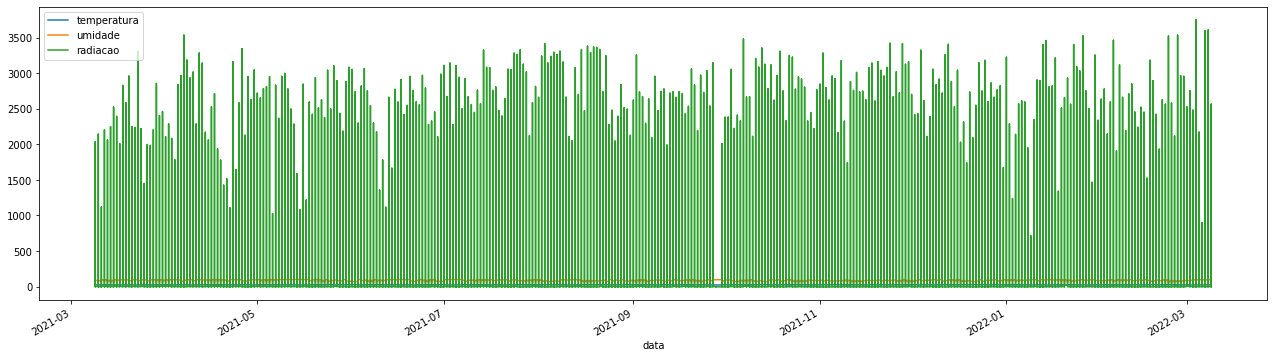

In [23]:
core_dados[["temperatura", "umidade","radiacao"]].plot(figsize=(22,6))

In [24]:
core_dados.groupby(core_dados.index.year).sum()

,horario,temperatura,umidade,radiacao
data,,,,
2021,8224800,192604.9,601611.0,4503647.702
2022,1876800,42883.7,141465.0,915370.894


In [25]:
core_dados['temp_amahao'] = core_dados.shift(-1)['temperatura']

In [26]:
core_dados

,horario,temperatura,umidade,radiacao,temp_amahao
data,,,,,
2021-03-09,0,25.1,96.0,3.289,25.1
2021-03-09,100,25.1,93.0,1.740,24.7
2021-03-09,200,24.7,94.0,0.970,24.4
2021-03-09,300,24.4,93.0,2.458,24.3
2021-03-09,400,24.3,92.0,3.320,24.2
...,...,...,...,...,...
2022-03-09,1900,25.4,96.0,96.821,25.6
2022-03-09,2000,25.6,97.0,103.734,25.2
2022-03-09,2100,25.2,97.0,37.913,24.9


<AxesSubplot:xlabel='data'>

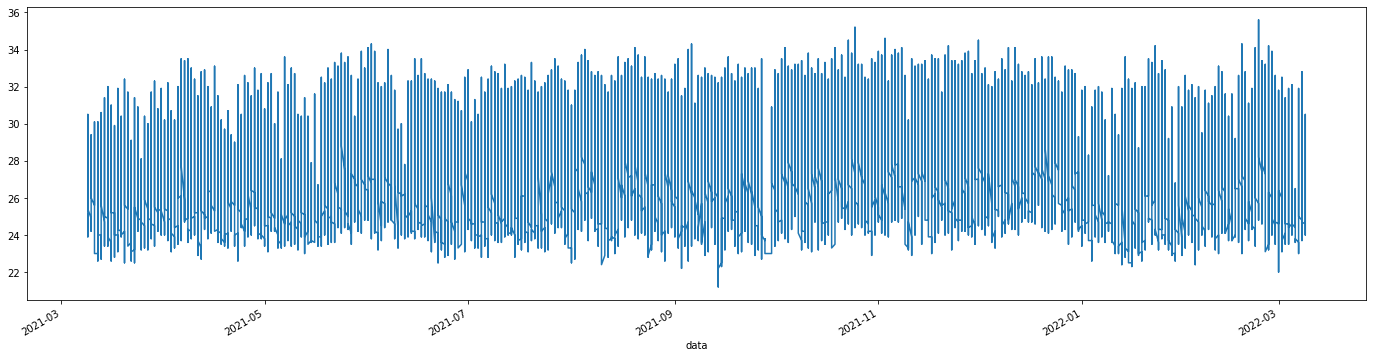

In [27]:
core_dados["temp_amahao"].plot(figsize=(24,6))

In [28]:
core_dados = core_dados.iloc[:-1, :].copy()

In [29]:
core_dados

,horario,temperatura,umidade,radiacao,temp_amahao
data,,,,,
2021-03-09,0,25.1,96.0,3.289,25.1
2021-03-09,100,25.1,93.0,1.740,24.7
2021-03-09,200,24.7,94.0,0.970,24.4
2021-03-09,300,24.4,93.0,2.458,24.3
2021-03-09,400,24.3,92.0,3.320,24.2
...,...,...,...,...,...
2022-03-09,1800,25.2,96.0,296.259,25.4
2022-03-09,1900,25.4,96.0,96.821,25.6
2022-03-09,2000,25.6,97.0,103.734,25.2


<AxesSubplot:xlabel='data'>

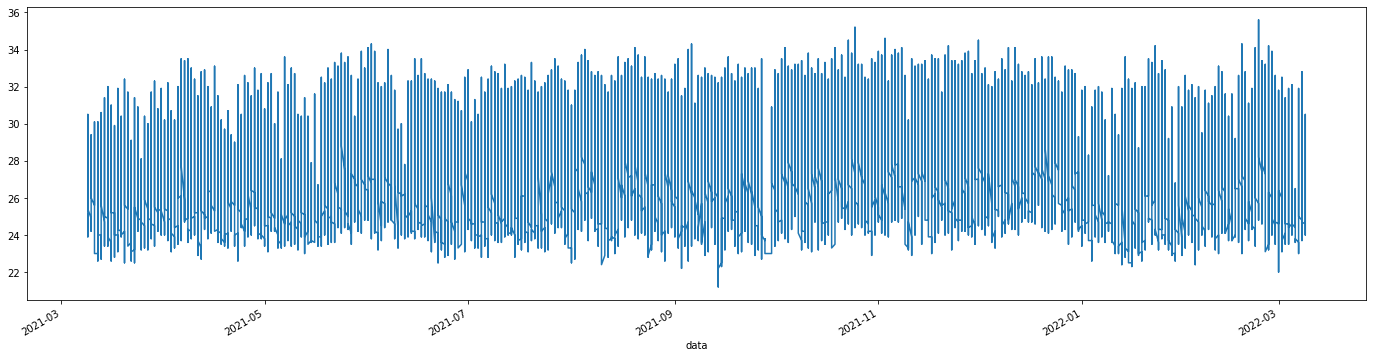

In [30]:
core_dados["temp_amahao"].plot(figsize=(24,6))

In [31]:
from sklearn.linear_model import  Ridge
reg = Ridge(alpha=.1)

In [32]:
preditores = ['horario', 'temperatura','umidade', 'radiacao']

In [33]:
train = core_dados.loc[:'2021-03-09']

In [34]:
test = core_dados.loc['2022-02-01':]

In [35]:
reg.fit(train[preditores],train['temp_amahao'])

Ridge(alpha=0.1)

In [36]:
previsoes = reg.predict(test[preditores])

In [37]:
from sklearn.metrics import mean_absolute_percentage_error

In [38]:
mean_absolute_percentage_error(test['temp_amahao'], previsoes)

0.03763312127084563

In [39]:
conjunto = pd.concat([test['temp_amahao'], pd.Series(previsoes, index=test.index,)], axis=1)
conjunto.columns = ['atual', 'previsoes']

In [40]:
conjunto

,atual,previsoes
data,,
2022-02-01,24.1,24.469049
2022-02-01,24.3,24.197650
2022-02-01,24.1,24.427220
2022-02-01,23.9,24.484518
2022-02-01,23.9,24.362447
...,...,...
2022-03-09,25.4,26.044290
2022-03-09,25.6,25.885161
2022-03-09,25.2,26.123935


In [41]:
reg.coef_

array([2.23214421e-04, 7.25107123e-01, 6.01144143e-02, 1.63695734e-03])

In [42]:
def criar_previsões(preditores, core_dados, reg):
    train = core_dados.loc[:'2021-03-10']
    test = core_dados.loc['2022-02-01':]
    reg.fit(train[preditores],train['temp_amahao'])
    previsoes = reg.predict(test[preditores])
    erro = mean_absolute_percentage_error(test['temp_amahao'], previsoes)
    conjunto = pd.concat([test['temp_amahao'], pd.Series(previsoes, index=test.index,)], axis=1)
    conjunto.columns = ['atual', 'previsoes']
    return erro, conjunto

In [1]:
core_dados['temp_mes_mix'] = core_dados['temperatura'].rolling(30).mean()

NameError: name 'core_dados' is not defined

In [44]:
core_dados

,horario,temperatura,umidade,radiacao,temp_amahao,temp_mes_mix
data,,,,,,
2021-03-09,0,25.1,96.0,3.289,25.1,NaN
2021-03-09,100,25.1,93.0,1.740,24.7,NaN
2021-03-09,200,24.7,94.0,0.970,24.4,NaN
2021-03-09,300,24.4,93.0,2.458,24.3,NaN
2021-03-09,400,24.3,92.0,3.320,24.2,NaN
...,...,...,...,...,...,...
2022-03-09,1800,25.2,96.0,296.259,25.4,27.320000
2022-03-09,1900,25.4,96.0,96.821,25.6,27.236667
2022-03-09,2000,25.6,97.0,103.734,25.2,27.066667


In [45]:
core_dados['temp_mes_dia_mix'] = core_dados['temp_mes_mix'] / core_dados['temperatura']

In [46]:
preditores = ['horario', 'temperatura','umidade', 'radiacao', 'temp_mes_mix','temp_mes_dia_mix']

In [47]:
core_dados = core_dados.iloc[30:,:].copy()

In [48]:
core_dados

,horario,temperatura,umidade,radiacao,temp_amahao,temp_mes_mix,temp_mes_dia_mix
data,,,,,,,
2021-03-10,600,24.2,96.0,0.640,24.2,25.773333,1.065014
2021-03-10,700,24.2,96.0,-0.006,24.2,25.743333,1.063774
2021-03-10,800,24.2,96.0,0.101,24.2,25.726667,1.063085
2021-03-10,900,24.2,96.0,0.586,24.4,25.720000,1.062810
2021-03-10,1000,24.4,96.0,15.308,24.8,25.723333,1.054235
...,...,...,...,...,...,...,...
2022-03-09,1800,25.2,96.0,296.259,25.4,27.320000,1.084127
2022-03-09,1900,25.4,96.0,96.821,25.6,27.236667,1.072310
2022-03-09,2000,25.6,97.0,103.734,25.2,27.066667,1.057292


<AxesSubplot:xlabel='data'>

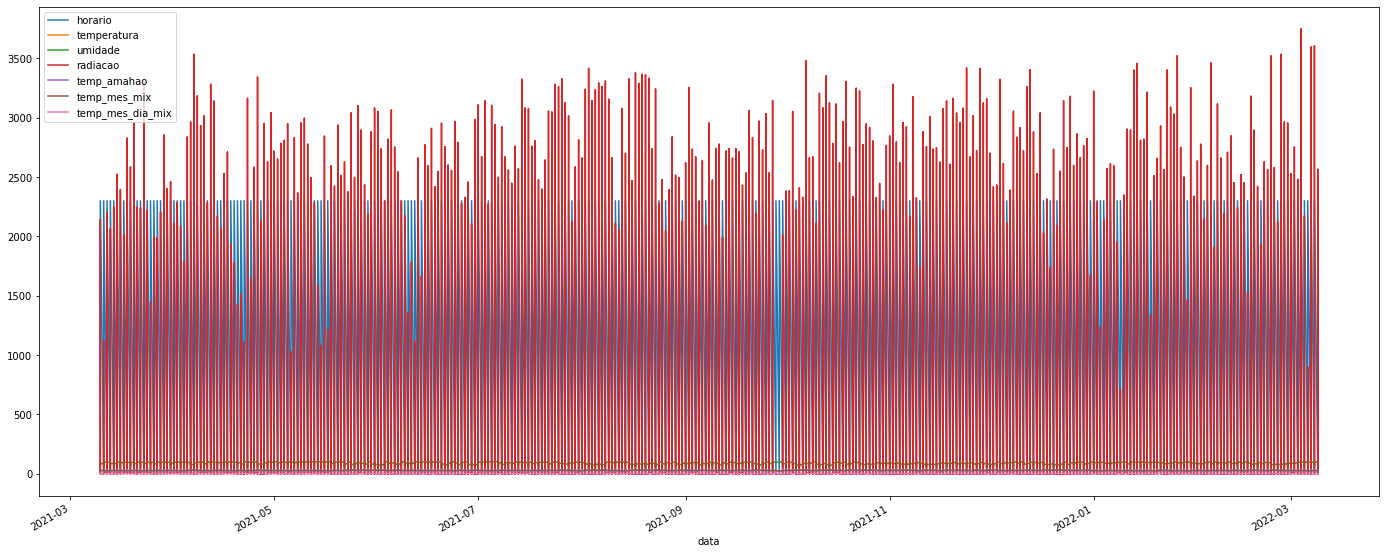

In [49]:
core_dados.plot(figsize=(24,10))

In [50]:
erro, conjunto = criar_previsões(preditores, core_dados, reg)

In [51]:
erro

0.08189267022607302

In [52]:
conjunto

,atual,previsoes
data,,
2022-02-01,24.1,24.555091
2022-02-01,24.3,23.916338
2022-02-01,24.1,24.179794
2022-02-01,23.9,23.954326
2022-02-01,23.9,24.110538
...,...,...
2022-03-09,25.4,21.235811
2022-03-09,25.6,21.488418
2022-03-09,25.2,21.782864


<AxesSubplot:xlabel='data'>

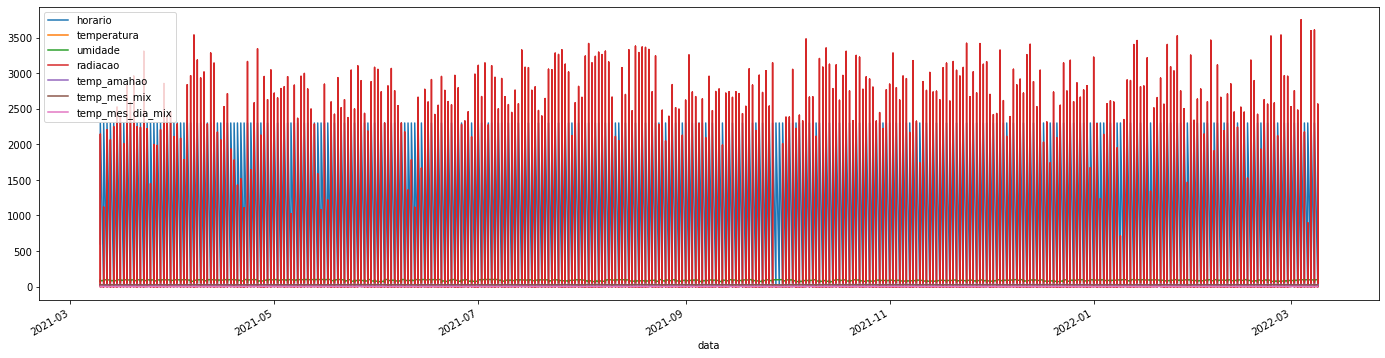

In [53]:
core_dados.plot(figsize=(24,6))

In [54]:
core_dados['temp_media_mes'] = core_dados['temperatura'].groupby(core_dados.index.month).apply(lambda x: x.expanding(1).mean())

In [55]:
core_dados

,horario,temperatura,umidade,radiacao,temp_amahao,temp_mes_mix,temp_mes_dia_mix,temp_media_mes
data,,,,,,,,
2021-03-10,600,24.2,96.0,0.640,24.2,25.773333,1.065014,24.200000
2021-03-10,700,24.2,96.0,-0.006,24.2,25.743333,1.063774,24.200000
2021-03-10,800,24.2,96.0,0.101,24.2,25.726667,1.063085,24.200000
2021-03-10,900,24.2,96.0,0.586,24.4,25.720000,1.062810,24.200000
2021-03-10,1000,24.4,96.0,15.308,24.8,25.723333,1.054235,24.240000
...,...,...,...,...,...,...,...,...
2022-03-09,1800,25.2,96.0,296.259,25.4,27.320000,1.084127,25.848840
2022-03-09,1900,25.4,96.0,96.821,25.6,27.236667,1.072310,25.848229
2022-03-09,2000,25.6,97.0,103.734,25.2,27.066667,1.057292,25.847891


In [56]:
core_dados["temp_dia_do_ano_media"] = core_dados['temperatura'].groupby(core_dados.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [57]:
core_dados

,horario,temperatura,umidade,radiacao,temp_amahao,temp_mes_mix,temp_mes_dia_mix,temp_media_mes,temp_dia_do_ano_media
data,,,,,,,,,
2021-03-10,600,24.2,96.0,0.640,24.2,25.773333,1.065014,24.200000,24.200000
2021-03-10,700,24.2,96.0,-0.006,24.2,25.743333,1.063774,24.200000,24.200000
2021-03-10,800,24.2,96.0,0.101,24.2,25.726667,1.063085,24.200000,24.200000
2021-03-10,900,24.2,96.0,0.586,24.4,25.720000,1.062810,24.200000,24.200000
2021-03-10,1000,24.4,96.0,15.308,24.8,25.723333,1.054235,24.240000,24.240000
...,...,...,...,...,...,...,...,...,...
2022-03-09,1800,25.2,96.0,296.259,25.4,27.320000,1.084127,25.848840,26.263158
2022-03-09,1900,25.4,96.0,96.821,25.6,27.236667,1.072310,25.848229,26.220000
2022-03-09,2000,25.6,97.0,103.734,25.2,27.066667,1.057292,25.847891,26.190476


In [58]:
preditores = ['horario', 'temperatura','umidade', 'radiacao', 'temp_mes_mix','temp_mes_dia_mix', 'temp_media_mes', 'temp_dia_do_ano_media']

In [59]:
erro, conjunto = criar_previsões(preditores, core_dados, reg)

In [60]:
erro

0.10113935590046384

In [61]:
conjunto

,atual,previsoes
data,,
2022-02-01,24.1,22.613251
2022-02-01,24.3,22.506981
2022-02-01,24.1,22.825321
2022-02-01,23.9,22.700852
2022-02-01,23.9,23.082075
...,...,...
2022-03-09,25.4,23.221884
2022-03-09,25.6,23.625534
2022-03-09,25.2,23.805685


temp_amahao    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

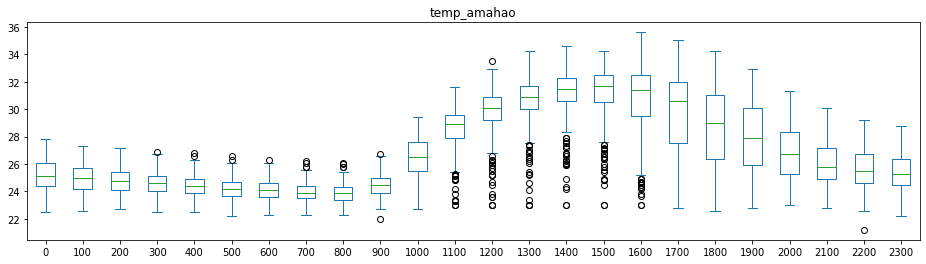

In [62]:
core_dados.plot.box(column='temp_amahao',by='horario',figsize=(16,4))

temperatura    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

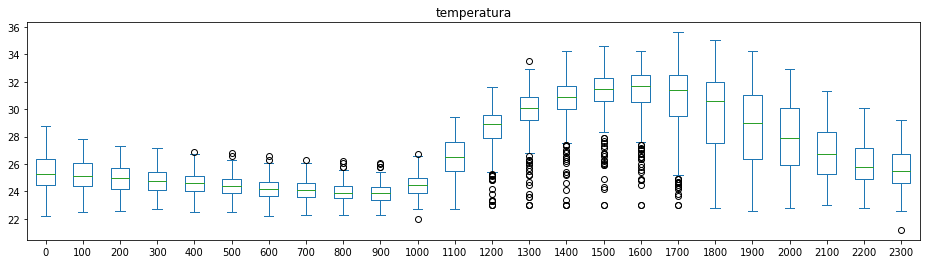

In [63]:
core_dados.plot.box(column=('temperatura'),by='horario',figsize=(16,4))

temp_media_mes    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

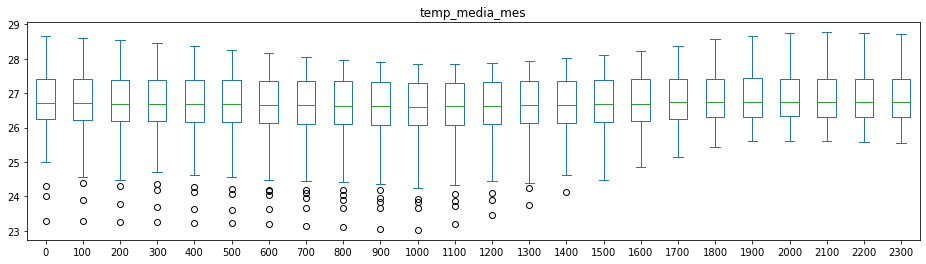

In [64]:
core_dados.plot.box(column='temp_media_mes',by='horario',figsize=(16,4))

temp_mes_dia_mix    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

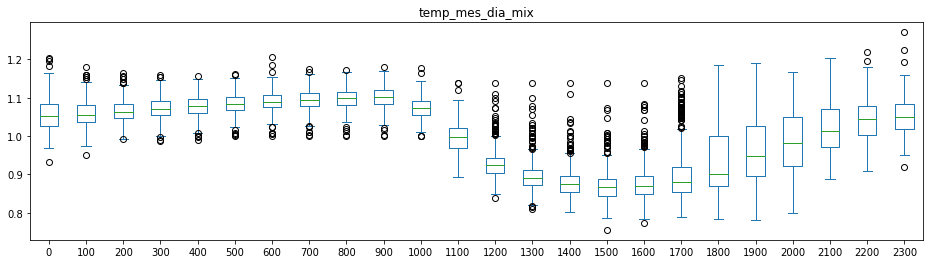

In [65]:
core_dados.plot.box(column='temp_mes_dia_mix',by='horario',figsize=(16,4))

temp_dia_do_ano_media    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

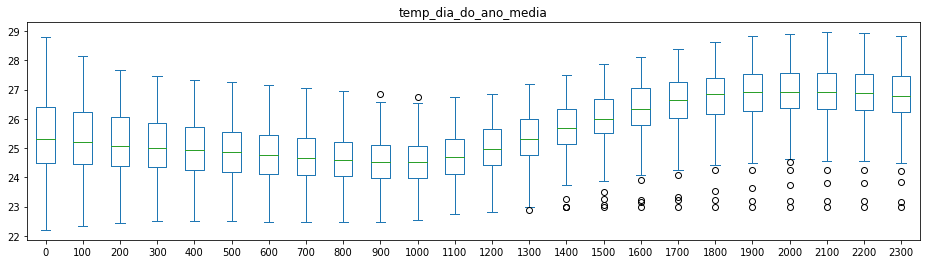

In [66]:
core_dados.plot.box(column='temp_dia_do_ano_media',by='horario',figsize=(16,4))

<AxesSubplot:ylabel='Density'>

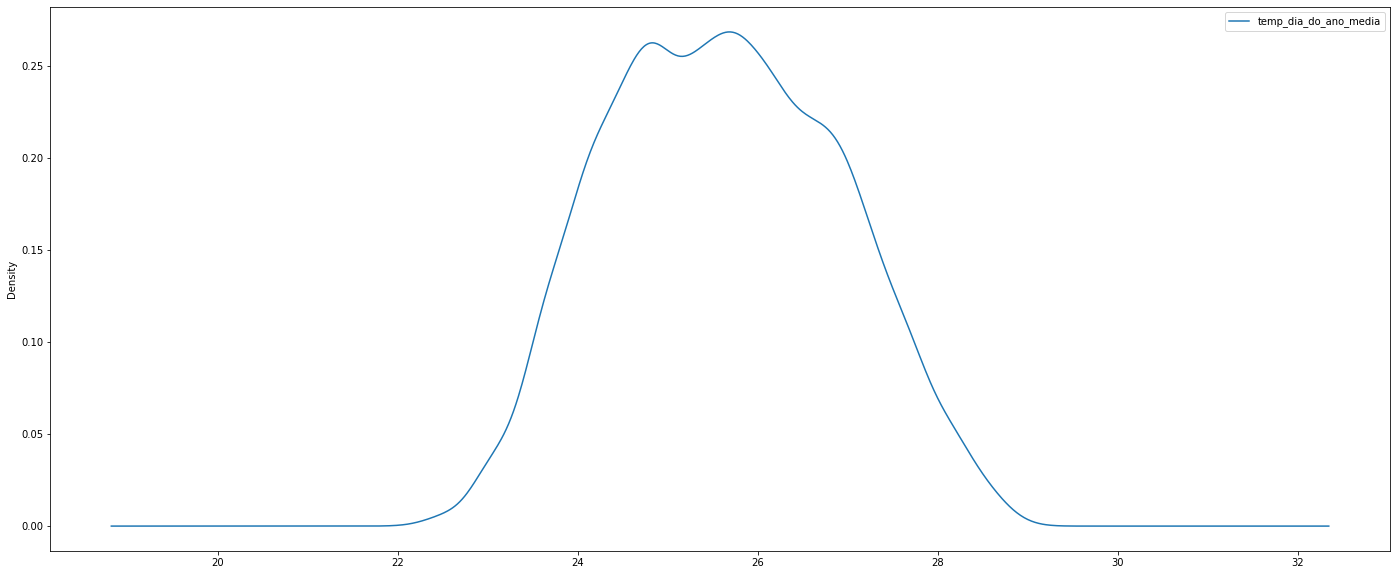

In [67]:
core_dados.plot.density(x="horario", y="temp_dia_do_ano_media", rot=0, figsize=(24, 10))

<AxesSubplot:xlabel='data'>

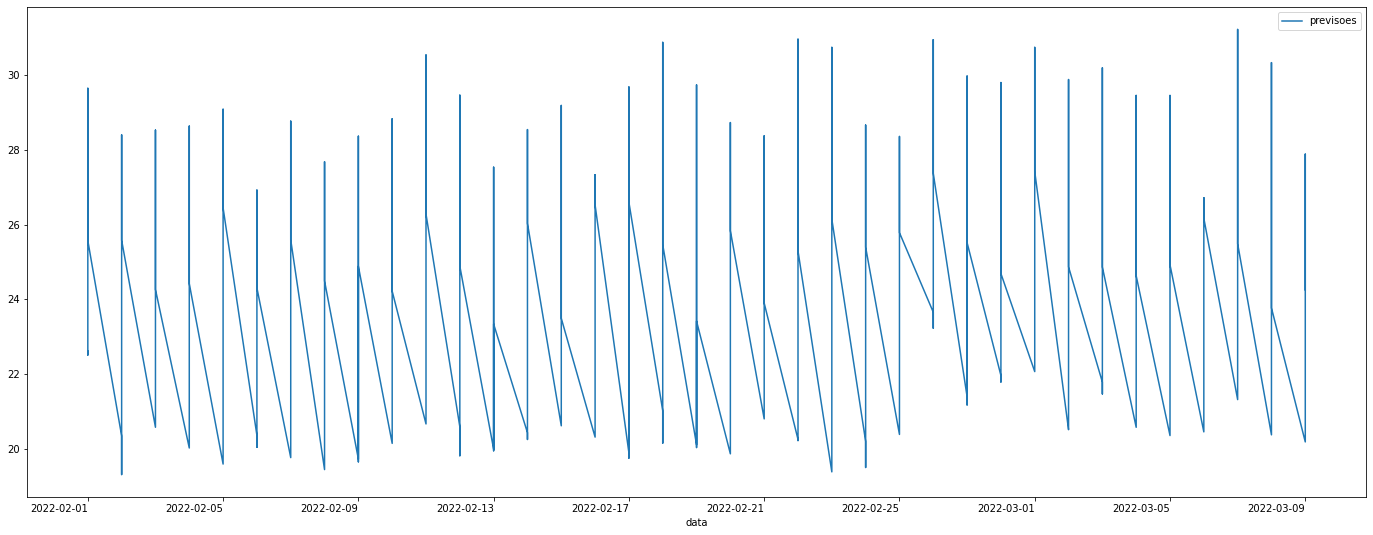

In [68]:
conjunto.plot( y="previsoes", rot=0, figsize=(24, 10))

In [69]:
core_dados.corr()["temp_amahao"]

horario                  0.416390
temperatura              0.899631
umidade                 -0.838922
radiacao                 0.834127
temp_amahao              1.000000
temp_mes_mix             0.414834
temp_mes_dia_mix        -0.864045
temp_media_mes           0.173192
temp_dia_do_ano_media    0.424554
Name: temp_amahao, dtype: float64

In [70]:
conjunto['dife'] = (conjunto['atual'] - conjunto['previsoes']).abs()

In [71]:
conjunto.sort_values('dife', ascending=False).head()

,atual,previsoes,dife
data,,,
2022-02-23,35.6,27.320857,8.279143
2022-02-24,27.4,20.193656,7.206344
2022-02-24,27.1,19.921292,7.178708
2022-02-24,26.9,19.800664,7.099336
2022-02-25,27.3,20.379024,6.920976


In [72]:
conjunto

,atual,previsoes,dife
data,,,
2022-02-01,24.1,22.613251,1.486749
2022-02-01,24.3,22.506981,1.793019
2022-02-01,24.1,22.825321,1.274679
2022-02-01,23.9,22.700852,1.199148
2022-02-01,23.9,23.082075,0.817925
...,...,...,...
2022-03-09,25.4,23.221884,2.178116
2022-03-09,25.6,23.625534,1.974466
2022-03-09,25.2,23.805685,1.394315


In [73]:
from neuralprophet import NeuralProphet
import pickle

In [74]:
core_dados.columns

Index(['horario', 'temperatura', 'umidade', 'radiacao', 'temp_amahao',
       'temp_mes_mix', 'temp_mes_dia_mix', 'temp_media_mes',
       'temp_dia_do_ano_media'],
      dtype='object')

In [75]:
m = NeuralProphet

In [76]:
data = core_dados[['horario', 'temperatura']]
data.dropna(inplace=True)

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_5113/1351931106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



In [77]:
data.head()

,horario,temperatura
data,,
2021-03-10,600,24.2
2021-03-10,700,24.2
2021-03-10,800,24.2
2021-03-10,900,24.2
2021-03-10,1000,24.4
